In [ ]:
# うまくいかない場合、最初にカーネルをリスタートするのが効果的かも

In [1]:
import os

file_path = "../data/practice2-1/kageotoko.txt"

if os.path.exists(file_path):
    print("ファイルが存在します:", file_path)
else:
    print("ファイルが存在しません:", file_path)

ファイルが存在します: ../data/practice2-1/kageotoko.txt


In [1]:
!pip cache purge
!pip install numpy pandas matplotlib scipy statsmodels scikit-learn tensorflow wordcloud

# spaCyとginzaをアンインストール
!pip uninstall -y spacy ginza ja_ginza

# 必要なバージョンを再インストール
!pip install spacy==3.0
!pip install ginza
!pip install --no-cache-dir spacy ginza ja_ginza



!pip install chardet

Files removed: 371
Files removed: 413
Found existing installation: spacy 3.8.2
Uninstalling spacy-3.8.2:
  Successfully uninstalled spacy-3.8.2
Found existing installation: ginza 5.2.0
Uninstalling ginza-5.2.0:
  Successfully uninstalled ginza-5.2.0
Found existing installation: ja-ginza 5.2.0
Uninstalling ja-ginza-5.2.0:
  Successfully uninstalled ja-ginza-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 13.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 3.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [167 lines of output]
      
      Error compiling Cython file:
      ------------------------------------------------------------
      ...
          int length
      
      
      cdef class Vocab:
          cdef Pool mem
          cpdef r

In [23]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.3 MB/s eta 0:00:00a 0:00:01


In [4]:
import os
print(os.getcwd())

/home/jovyan/notebooks


In [2]:
# Q1-0

import re
import chardet

output_file_path = "../data/practice2-1/cleaned_data5-1.txt"  # 前処理を施した後の出力先

try:
    # 文字コードを検出
    with open(file_path, mode='rb') as file:
        raw_data = file.read()  # ファイル全体を読み込む
        result = chardet.detect(raw_data)  # 文字コードを検出
        encoding = result['encoding']  # 検出された文字コードを取得
        print(f"検出されたエンコーディング: {encoding}")

    # 検出された文字コードで再度ファイルを読み込む
    with open(file_path, mode='r', encoding=encoding) as file:
        lines = file.readlines()  # ファイル全体を行ごとにリストで読み込み

    # 冒頭18行と末尾14行を除去
    content = lines[18:-14]  # 行スライスで必要な部分を抽出
    text = "".join(content)  # リストを結合して1つの文字列にする

    # タグ除去処理
    text_cleaned = re.sub(r"｜(.*?)《.*?》", r"\1", text)  # 「｜親文字《ルビ》」形式を「親文字」に変換
    text_cleaned = re.sub(r"《.*?》", "", text_cleaned)  # 念のため「《ルビ》」単体の削除
    text_cleaned = re.sub(r"［＃.*?］", "", text_cleaned)  # ［＃入力者注］を削除


    # 結果を新しいファイルに保存
    with open(output_file_path, mode='w', encoding='utf-8') as output_file:
        output_file.write(text_cleaned)

    print(f"処理が完了しました。結果を {output_file_path} に保存しました。")

except FileNotFoundError:
    print(f"ファイルが見つかりません: {file_path}")
except UnicodeDecodeError:
    print("文字コードのデコードに失敗しました。UTF-8以外の文字コードが使用されている可能性があります。")
except Exception as e:
    print(f"予期しないエラーが発生しました: {e}")

検出されたエンコーディング: SHIFT_JIS
処理が完了しました。結果を ../data/practice2-1/cleaned_data5-1.txt に保存しました。


In [3]:
#q1-1

import spacy

#ja_ginzaのロード
nlp = spacy.load("ja_ginza")

#対象の文
text = "今日はラーメンを食べる"

#解析
doc = nlp(text)

#分かち書きの出力
print("分かち書き:", "/".join([token.text for token in doc]))

#形態素解析の出力
print("\n形態素解析の出力:")
print(f"{'形態素':<10} {'活用形':<10} {'品詞':<10}")
print("-" * 30)

for token in doc:
    print(f"{token.text:<10} {token.morph.get('Inflection', ['-'])[0]:<10} {token.pos_:<10}")

分かち書き: 今日/は/ラーメン/を/食べる

形態素解析の出力:
形態素        活用形        品詞        
------------------------------
今日         -          NOUN      
は          -          ADP       
ラーメン       -          NOUN      
を          -          ADP       
食べる        下一段-バ行;終止形-一般 VERB      


In [6]:
#Q1-2

# ファイルからテキストを読み込む
with open(output_file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# 各行を分かち書き
results1 = []
for line in lines:
    line = line.strip()  # 改行や余分な空白を削除
    if line:  # 空行を無視
        doc = nlp(line)
        results1.append("/".join([token.text for token in doc]))

# 結果の冒頭10行を表示
print("分かち書き結果の冒頭10行:")
for i, result in enumerate(results1[:10], start=1):
    print(f"{i}: {result}")

分かち書き結果の冒頭10行:
1: 三十二/、/三/歳/に/見える/やせ型/の/男/が/、/張/ホテル/の/玄関/を/はいっ/て/、/カウンター/の/うしろ/の/支配人/室/へ/踏みこん/で/いっ/た/。
2: ずんぐり/と/背/が/低く/て/丸々/と/太っ/た/ちょびひげ/の/支配人/が/デスク/に/向かっ/て/帳簿/を/いじくっ/て/い/た/。/そば/の/灰/ざら/に/のせ/た/半分/ほど/に/なっ/た/葉巻き/から/、/細い/紫色/の/煙/が/ほとんど/まっすぐ/に/立ちのぼっ/て/い/た/。/ハバナ/の/かおり/が/何/か/猥/※/な/感じ/で/漂っ/て/い/た/。
2: ずんぐり/と/背/が/低く/て/丸々/と/太っ/た/ちょびひげ/の/支配人/が/デスク/に/向かっ/て/帳簿/を/いじくっ/て/い/た/。/そば/の/灰/ざら/に/のせ/た/半分/ほど/に/なっ/た/葉巻き/から/、/細い/紫色/の/煙/が/ほとんど/まっすぐ/に/立ちのぼっ/て/い/た/。/ハバナ/の/かおり/が/何/か/猥/※/《/わいせつ/》/な/感じ/で/漂っ/て/い/た/。
3: 「/来/て/いる/ね/？/」
4: やせ型/の/男/が/ニヤッ/と/笑っ/て/たずね/た/。
5: 「/うん/、/来/て/いる/。/もう/始まっ/て/いる/ころ/だ/よ/」
6: 「/じゃあ/、/あの/へや/へ/行く/よ/」
7: 「/いい/とも/、/見つかり/っこ/は/ない/が/、/せいぜい/用心/し/て/ね/」
8: やせ型/の/男/は/ネズミ色/の/セビロ/を/着/て/、/ネズミ色/の/ワイシャツ/、/ネズミ色/の/ネクタイ/、/くつ/まで/ネズミ色/の/もの/を/はい/て/い/た/。/どんな/背景/の/前/で/も/最も/目だた/ない/服装/で/あっ/た/。/かれ/は/まったく/足音/を/たて/ない/で/階段/を/駆け上がり/、/二/階/の/ずっと/奥まっ/た/一室/の/ドア/を/そっと/ひらい/て/、/中/に/すべりこむ/と/、/電灯/も/つけ/ず/、/一方/の/壁/に/ある/押し入れ/の/戸/を/用意/の/カギ/で/ひらき/、/その/中/へ/身/を/隠し/た/。
9: まっくら/だ/けれど/、/かれ/は/その/へや/の/構造/を/手/に/とる/よう/に/知っ/て/い/た/。/そこ/は/普通/の

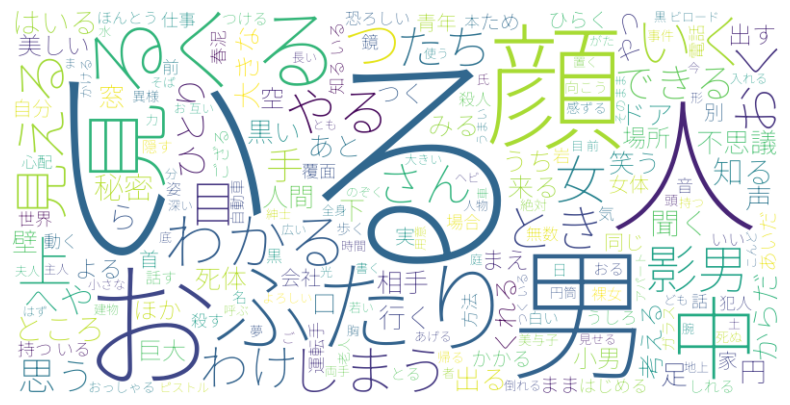

In [7]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ストップワードと対象品詞
stopwords = {'する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう'}
include_pos = {'NOUN', 'VERB', 'ADJ'}  # 名詞、動詞、形容詞

nlp = spacy.load("ja_ginza")
output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

# フィルタリングして単語リストを作成
filtered_words = []

# 一行ずつ読み込んで処理
with open(output_file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# 100行ずつチャンクに分ける
chunks = [' '.join(lines[i:i+100]) for i in range(0, len(lines), 100)]

# 各チャンクに対して処理
for chunk in chunks:
    doc = nlp(chunk)
    filtered_words.extend([
        token.lemma_  # 原形を使用
        for token in doc
        if token.pos_ in include_pos and token.lemma_ not in stopwords
    ])

# ワードクラウド用テキストの生成
wordcloud_text = " ".join(filtered_words)

# ワードクラウドの生成
wordcloud = WordCloud(
    font_path="../data/practice2-1/Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf",  # 日本語フォントのパスを指定
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(wordcloud_text)

# ワードクラウドの表示
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [35]:
#q1-4
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stopwords = {'する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう'}
include_pos = {'NOUN', 'VERB', 'ADJ'}  

nlp = spacy.load("ja_ginza")
output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

# フィルタリング後の単語リスト
filtered_words = []

with open(output_file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

chunks = [' '.join(lines[i:i+100]) for i in range(0, len(lines), 100)]

for chunk in chunks:
    doc = nlp(chunk)
    filtered_words.extend([
        token.lemma_  
        for token in doc
        if token.pos_ in include_pos and token.lemma_ not in stopwords
    ])

# 全単語の頻度
all_words = [token.lemma_ for token in doc]
all_word_freq = Counter(all_words).most_common(10)

# フィルタリング後の頻度
filtered_word_freq = Counter(filtered_words).most_common(10)

print("全単語の頻度上位10件:", all_word_freq)
print("フィルタリング後の頻度上位10件:", filtered_word_freq)

全単語の頻度上位10件: [('の', 24), ('た', 19), ('。', 19), ('、', 18), ('は', 13), ('て', 13), ('だ', 11), ('いる', 9), ('が', 8), ('を', 7)]
フィルタリング後の頻度上位10件: [('いる', 1262), ('\n \u3000', 816), ('お', 242), ('中', 212), ('人', 206), ('男', 197), ('くる', 193), ('顔', 175), ('いく', 157), ('ふたり', 157)]


全単語の頻度上位10件: [('、', 6700), ('の', 5921), ('。', 4475), ('た', 3536), ('て', 3480), ('だ', 3158), ('に', 2846), ('は', 2834), ('を', 2621), ('が', 2519)]
フィルタリング後の頻度上位10件: [('いる', 1262), ('お', 241), ('中', 212), ('人', 206), ('男', 197), ('くる', 193), ('顔', 175), ('いく', 157), ('ふたり', 156), ('つ', 143)]


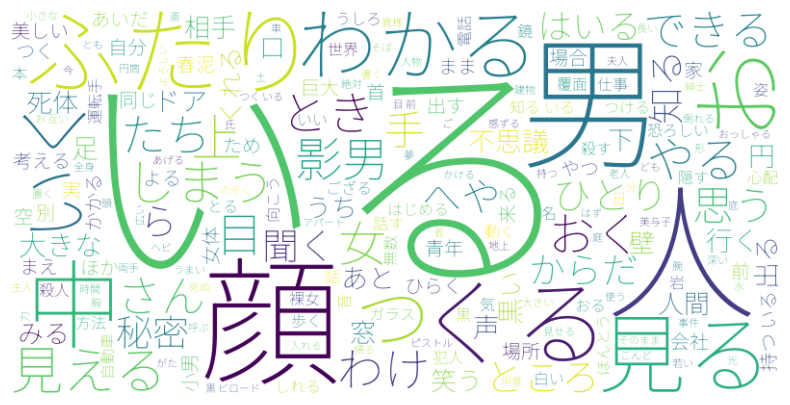

In [32]:
#q1-4
#余談

import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# ストップワードの拡張
stopwords = {
    'する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう',
    'の', 'は', 'が', 'を', 'に', 'で', 'と', 'た', 'て', 'だ', 'な', 'へ', 
    'も', 'から', 'や', 'まで', 'より', 'なり', 'けれど', 'そして', 'けど',
    '.', ',', '。', '、', '\n', '\u3000', ' '
}
include_pos = {'NOUN', 'VERB', 'ADJ'} 

nlp = spacy.load("ja_ginza")

output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

filtered_words = []

with open(output_file_path, "r", encoding="utf-8") as file:
    text = file.read()

# 改行や余分なスペースの削除
cleaned_text = re.sub(r'[\n\u3000]+', ' ', text)

# テキストをチャンクに分割
chunks = [cleaned_text[i:i+10000] for i in range(0, len(cleaned_text), 10000)]

# チャンクごとに解析
for chunk in chunks:
    doc = nlp(chunk)
    filtered_words.extend([
        token.lemma_  
        for token in doc
        if token.pos_ in include_pos and token.lemma_ not in stopwords
    ])

all_words = [token.lemma_ for chunk in chunks for token in nlp(chunk)]
all_word_freq = Counter(all_words).most_common(10)

filtered_word_freq = Counter(filtered_words).most_common(10)

print("全単語の頻度上位10件:", all_word_freq)
print("フィルタリング後の頻度上位10件:", filtered_word_freq)

wordcloud = WordCloud(
    font_path="../data/practice2-1/Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf",  # 日本語フォントを指定
    background_color="white",
    width=800,
    height=400
).generate(" ".join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [36]:
#q1-5
import spacy
from collections import Counter
from itertools import combinations
import re

# ストップワードと品詞の設定
stopwords = {'する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう'}
include_pos = {'NOUN', 'VERB', 'ADJ'}  # 名詞、動詞、形容詞

nlp = spacy.load("ja_ginza")

output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

with open(output_file_path, "r", encoding="utf-8") as file:
    text = file.read()

cleaned_text = re.sub(r'[\n\u3000]+', ' ', text)

chunks = [cleaned_text[i:i+10000] for i in range(0, len(cleaned_text), 10000)]

# 共起ペアをカウントするためのリスト
co_occurrences = []

# チャンクごとに解析
for chunk in chunks:
    doc = nlp(chunk)
    # フィルタリング後の単語リスト
    filtered_words = [
        token.lemma_
        for token in doc
        if token.pos_ in include_pos and token.lemma_ not in stopwords
    ]
    # 共起ペアの抽出（単語間の組み合わせ）
    co_occurrences.extend(combinations(filtered_words, 2))

# 共起ペアの頻度をカウント
co_occurrence_counts = Counter(co_occurrences).most_common(10)

# 結果を表示
print("共起する単語ペア上位10件とその回数:")
for pair, count in co_occurrence_counts:
    print(f"{pair}: {count}")


共起する単語ペア上位10件とその回数:
('いる', 'いる'): 51353
('いる', '人'): 9373
('中', 'いる'): 9327
('お', 'いる'): 9281
('男', 'いる'): 9256
('いる', '中'): 8257
('くる', 'いる'): 8185
('いる', 'お'): 8153
('人', 'いる'): 7484
('いる', '顔'): 7480


In [30]:
#余談p2

#q1-5
import spacy
from collections import Counter
from itertools import combinations
import re

stopwords = {
    'する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう',
    'の', 'は', 'が', 'を', 'に', 'で', 'と', 'た', 'て', 'だ', 'な', 'へ',
    'も', 'から', 'や', 'まで', 'より', 'なり', 'けれど', 'そして', 'けど',
    '.', ',', '。', '、', '\n', '\u3000', ' ', 'いる', 'お'
} # ストップワードに意味の薄い単語や、改行などを追加

include_pos = {'NOUN', 'VERB', 'ADJ'} 

nlp = spacy.load("ja_ginza")

output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

with open(output_file_path, "r", encoding="utf-8") as file:
    text = file.read()

cleaned_text = re.sub(r'[\n\u3000]+', ' ', text)

chunks = [cleaned_text[i:i+10000] for i in range(0, len(cleaned_text), 10000)]

# 共起ペアをカウントするためのリスト
co_occurrences = []

# チャンクごとに解析
for chunk in chunks:
    doc = nlp(chunk)
    # フィルタリング後の単語リスト
    filtered_words = [
        token.lemma_
        for token in doc
        if token.pos_ in include_pos and token.lemma_ not in stopwords
    ]
    # 共起ペアの抽出（単語間の組み合わせ）
    co_occurrences.extend(combinations(filtered_words, 2))

# 共起ペアの頻度をカウント
co_occurrence_counts = Counter(co_occurrences).most_common(10)

# 結果を表示
print("共起する単語ペア上位10件とその回数:")
for pair, count in co_occurrence_counts:
    print(f"{pair}: {count}")


共起する単語ペア上位10件とその回数:
('中', '中'): 1749
('中', '人'): 1566
('男', '男'): 1515
('男', '人'): 1487
('くる', '人'): 1485
('人', '人'): 1468
('中', '顔'): 1422
('男', 'くる'): 1357
('男', '中'): 1343
('くる', 'くる'): 1335


In [31]:
#余談p2-2

#q1-5
import spacy
from collections import Counter
from itertools import combinations
import re

stopwords = {
    'する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう',
    'の', 'は', 'が', 'を', 'に', 'で', 'と', 'た', 'て', 'だ', 'な', 'へ',
    'も', 'から', 'や', 'まで', 'より', 'なり', 'けれど', 'そして', 'けど',
    '.', ',', '。', '、', '\n', '\u3000', ' ', 'いる', 'お'
} 

include_pos = {'NOUN', 'VERB', 'ADJ'}

nlp = spacy.load("ja_ginza")

output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

with open(output_file_path, "r", encoding="utf-8") as file:
    text = file.read()

cleaned_text = re.sub(r'[\n\u3000]+', ' ', text)

chunks = [cleaned_text[i:i+10000] for i in range(0, len(cleaned_text), 10000)]

# 共起ペアをカウントするためのリスト
co_occurrences = []

# チャンクごとに解析
for chunk in chunks:
    doc = nlp(chunk)
    # フィルタリング後の単語リスト
    # 共起範囲を調整することで、偏りが無くなるようにしてみる
    for sent in doc.sents:
        filtered_words = [
            token.lemma_
            for token in sent
            if token.pos_ in include_pos and token.lemma_ not in stopwords
        ]
        co_occurrences.extend(combinations(filtered_words, 2))

# 共起ペアの頻度をカウント
co_occurrence_counts = Counter(co_occurrences).most_common(10)

# 結果を表示
print("共起する単語ペア上位10件とその回数:")
for pair, count in co_occurrence_counts:
    print(f"{pair}: {count}")


共起する単語ペア上位10件とその回数:
('黒', 'ビロード'): 26
('殺人', '会社'): 25
('目', '前'): 23
('良', '斎'): 22
('じい', 'さん'): 20
('ドア', 'ひらく'): 19
('つ', '顔'): 19
('男', '女'): 18
('中', 'はいる'): 18
('中', 'いく'): 18


In [37]:
#q1-6

import spacy
import re

nlp = spacy.load("ja_ginza")

output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

with open(output_file_path, "r", encoding="utf-8") as file:
    text = file.read()

cleaned_text = re.sub(r'[\n\u3000]+', ' ', text)

chunks = [cleaned_text[i:i+10000] for i in range(0, len(cleaned_text), 10000)]

# 共起条件の単語
target_words = {"世界", "地底"}

# 条件を満たす文を収集
co_occurring_sentences = []

# チャンクごとに処理
for chunk in chunks:
    doc = nlp(chunk)
    co_occurring_sentences.extend([
        sent.text
        for sent in doc.sents
        if target_words.issubset(set(token.text for token in sent))
    ])

# 結果を表示
if co_occurring_sentences:
    print("共起する文:")
    for i, sentence in enumerate(co_occurring_sentences, 1):
        print(f"{i}: {sentence}")

共起する文:
1: そういうおかたは、この地底世界へおつれすることさえむずかしい。
2: かれはそこでは、いつものゆすりを行なう気にもならず、地底の主人公のちょびひげ紳士と親交を約して別れをつげ、地上世界に立ち帰った。
3: むろん、地底世界のつづきなのだ。
4: この地底世界に、それほどの巨資があるのであろうか。
5: このまえにちょびひげがいっていたのでは、地底世界の女の数は百人ぐらいのはずであった。
6: 地上世界の見せ物でこんなことをやれば、すぐに種がわかってしまうが、地底の洞窟という好条件がある。
7: 洞窟にはいってから二時間あまり、黒いメフィストは時を忘れ、追われている身を忘れ、地上のいっさいの煩いを忘れ、艶樹の森と、地底世界をどよもす音楽と、歌声と、踊り狂う五面十脚の美しい怪獣とに、果てしもなく酔いしれていたが、ふと気がつくと、またしても、ただならぬ奇怪事が起こっていた。
8: どうしてこの地底世界へ、警官がはいりこんできたのか。
9: 地底世界の経営者が内通したのだろうか。
10: すると、こういうおもしろい地底の世界を見せてくれた。
11: 「それにしても、明智先生は、この地底の世界へははじめて来られたのでしょう。
12: 一方、ぼくは地底世界で、ちょっと荒療治をやった。
13: 地底世界の様子が、あらましわかった。
14: それから、ちょびひげを脅迫して、池のシリンダーを浮き上がらせ、待機していた十人の警官を地底世界に引き入れた。
15: この世の果て 明智小五郎は、中村警部やその部下とともに、地底世界の入り口に近いいわゆる事務室にもどっていた。
16: 二つの世界で、わたしの地底王国はいっぱいですよ」


In [38]:
#q1-7

import spacy
import pandas as pd
from spacy import displacy

nlp = spacy.load("ja_ginza")

sample_sentence = "このまえにちょびひげがいっていたのでは、地底世界の女の数は百人ぐらいのはずであった。"

doc = nlp(sample_sentence)

results = []
for token in doc:
    results.append({
        "表層形": token.text,
        "原形": token.lemma_,
        "品詞": token.pos_,
        "係り受け種類": token.dep_,
        "受ける語": [child.text for child in token.children],
    })

df = pd.DataFrame(results)
print(df)

# 係り受けの図示
displacy.render(doc, style="dep", jupyter=True, options={"compact": True, "color": "blue"})


      表層形     原形     品詞    係り受け種類                           受ける語
0      この     この    DET       det                             []
1      まえ     まえ   NOUN       obl                        [この, に]
2       に      に    ADP      case                             []
3   ちょびひげ  ちょびひげ  PROPN     nsubj                            [が]
4       が      が    ADP      case                             []
5      いっ     いう   VERB       obl  [まえ, ちょびひげ, て, た, の, で, は, 、]
6       て      て  SCONJ      mark                            [い]
7       い     いる   VERB     fixed                             []
8       た      た    AUX       aux                             []
9       の      の  SCONJ      mark                             []
10      で      だ    ADP      case                             []
11      は      は    ADP      case                             []
12      、      、  PUNCT     punct                             []
13     地底     地底   NOUN  compound                             []
14     世界     世界   NOUN  

findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.
findfont: Font family 'Noto Sans JP' not found.


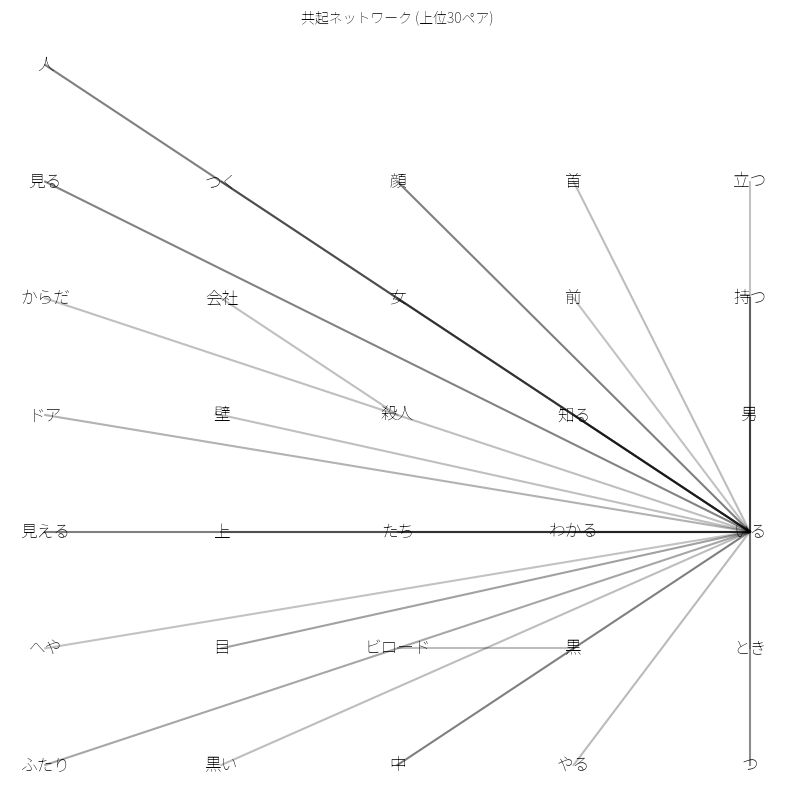

In [13]:
import spacy
import re
from collections import Counter
from itertools import combinations
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 日本語フォントの設定 (NotesansJP)
font_path = "../data/practice2-1/Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf"  # フォントのパスに置き換え
try:
    font_prop = fm.FontProperties(fname=font_path)
except FileNotFoundError:
    print("指定したフォントが見つかりませんでした。適切なフォントパスを指定してください。")
    exit()

nlp = spacy.load("ja_ginza")

stopwords = {'する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう'}
include_pos = {'NOUN', 'VERB', 'ADJ'}

output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

with open(output_file_path, "r", encoding="utf-8") as file:
    text = file.read()

cleaned_text = re.sub(r'[\n\u3000]+', ' ', text)
chunks = [cleaned_text[i:i+10000] for i in range(0, len(cleaned_text), 10000)]

# 共起ペアの抽出
co_occurrences = []

for chunk in chunks:
    doc = nlp(chunk)
    for sent in doc.sents:
        filtered_words = [
            token.lemma_ for token in sent
            if token.pos_ in include_pos and token.lemma_ not in stopwords
        ]
        co_occurrences.extend(combinations(filtered_words, 2))

# 共起ペアの頻度をカウント
co_occurrence_counts = Counter(co_occurrences)

# 上位の共起ペアを抽出
top_co_occurrences = co_occurrence_counts.most_common(30)  # 上位30ペア
words = set(word for pair, _ in top_co_occurrences for word in pair)

# 描画用データの準備
word_positions = {word: (i % 5, i // 5) for i, word in enumerate(words)}  # 整列レイアウト
edges = [(pair[0], pair[1], count) for pair, count in top_co_occurrences]

# 描画
plt.figure(figsize=(10, 10))
for word1, word2, weight in edges:
    x1, y1 = word_positions[word1]
    x2, y2 = word_positions[word2]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=min(0.5, weight / 100))  # エッジの太さを頻度で調整

# ノードの描画
for word, (x, y) in word_positions.items():
    plt.text(x, y, word, fontsize=12, ha='center', va='center', fontproperties=font_prop)

plt.title("共起ネットワーク (上位30ペア)", fontsize=16, fontproperties=font_prop)
plt.axis('off')
plt.show()
